In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("players_20.csv")
data.head()
data = data.fillna(0)
data = data[data.club != 'Portugal']
data = data[data.club != 'Uruguay']

## Which are the 20 most competitive clubs?

In [3]:
position = "LWB"
position1 = "LB"
position2 = "RB"
position3 = "RWB"
position4 = "LCB"
position5 = "CB"
position6 = "RCB"
defender = data[(data.player_positions.str.contains(position)) | 
               (data.player_positions.str.contains(position1)) | 
               (data.player_positions.str.contains(position2)) | 
               (data.player_positions.str.contains(position3)) | 
               (data.player_positions.str.contains(position4)) | 
               (data.player_positions.str.contains(position5)) | 
               (data.player_positions.str.contains(position6)) ]

#midfielders
position = "LW"
position1 = "RW"
position2 = "LAM"
position3 = "CAM"
position4 = "RAM"
position5 = "LM"
position6 = "LCM"
position7 = "CM"
position8 = "RCM"
position9 = "RM"
position10 = "LDM"
position11 = "CDM"
position12 = "RDM"
midfielder = data[(data.player_positions.str.contains(position)) | 
               (data.player_positions.str.contains(position1)) | 
               (data.player_positions.str.contains(position2)) | 
               (data.player_positions.str.contains(position3)) | 
               (data.player_positions.str.contains(position4)) | 
               (data.player_positions.str.contains(position5)) | 
               (data.player_positions.str.contains(position6)) |
               (data.player_positions.str.contains(position7)) |
               (data.player_positions.str.contains(position8)) |
               (data.player_positions.str.contains(position9)) |
               (data.player_positions.str.contains(position10)) |
               (data.player_positions.str.contains(position11)) |
               (data.player_positions.str.contains(position12))]

#forward
position = "LS"
position1 = "ST"
position2 = "RS"
position3 = "LF"
position4 = "CF"
position5 = "RF"
forward = data[(data.player_positions.str.contains(position)) | 
               (data.player_positions.str.contains(position1)) | 
               (data.player_positions.str.contains(position2)) | 
               (data.player_positions.str.contains(position3)) | 
               (data.player_positions.str.contains(position4)) | 
               (data.player_positions.str.contains(position5))]

#goalkeepers
position = "GK"
goalkeeper = data[data.player_positions.str.contains(position)]

In [4]:
defender_score = defender.groupby('club').mean()[['potential','overall','pace', 'shooting',
                                                  'passing', 'dribbling', 'defending', 'physic', 
                                                  'defending_marking','defending_standing_tackle',
                                                  'defending_sliding_tackle','movement_acceleration',
                                                  'movement_sprint_speed','movement_agility', 
                                                  'movement_reactions','movement_balance',
                                                  'power_shot_power','power_jumping','power_stamina',
                                                  'power_strength','power_long_shots',
                                                  'mentality_aggression', 'mentality_interceptions',
                                                  'mentality_positioning','mentality_vision',
                                                  'mentality_penalties','mentality_composure',
                                                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 
                                                  'skill_long_passing', 'skill_ball_control',
                                                  'lwb','lb','rb','rwb','lcb','cb','rcb']]
d_score = defender_score.mean(axis = 1).sort_values(ascending=False).reset_index(name ='defender_score')

In [5]:
midfielder_score = midfielder.groupby('club').mean()[['pace', 'shooting', 'passing', 'potential','overall',
                                                      'dribbling', 'defending', 'physic', 
                                                      'attacking_crossing', 'attacking_finishing', 
                                                      'attacking_heading_accuracy', 'attacking_short_passing', 
                                                      'attacking_volleys', 'skill_dribbling', 
                                                      'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
                                                      'skill_ball_control', 'movement_acceleration', 
                                                      'movement_sprint_speed', 'movement_agility', 
                                                      'movement_reactions', 'movement_balance', 
                                                      'power_shot_power', 'power_jumping', 'power_stamina', 
                                                      'power_strength', 'power_long_shots', 
                                                      'mentality_aggression', 'mentality_interceptions', 
                                                      'mentality_positioning', 'mentality_vision', 
                                                      'mentality_penalties', 'mentality_composure', 
                                                      'lw', 'rw', 'lam', 'cam', 'ram', 'lm', 
                                                      'lcm', 'cm', 'rcm', 'rm','ldm','cdm','rdm']
]
m_score = midfielder_score.mean(axis = 1).reset_index(name ='midfielder_score')

In [6]:
goalkeeper_score = goalkeeper.groupby('club').mean()[['pace', 'shooting', 'passing', 'dribbling', 'defending', 
                                                      'physic','gk_diving','gk_handling','gk_kicking',
                                                      'gk_reflexes','gk_speed','gk_positioning',
                                                      'movement_acceleration','movement_sprint_speed',
                                                      'movement_agility','movement_reactions',
                                                      'movement_balance','power_shot_power','power_jumping',
                                                      'power_stamina','power_strength','power_long_shots',
                                                      'mentality_aggression','mentality_interceptions',
                                                      'mentality_positioning','mentality_vision',
                                                      'mentality_penalties','mentality_composure',
                                                      'potential', 'overall']]
g_score = goalkeeper_score.mean(axis = 1).reset_index(name ='goalkeeper_score')

In [7]:
forward_score = forward.groupby('club').mean()[['attacking_crossing','attacking_finishing',
                                                'attacking_heading_accuracy','attacking_short_passing',
                                                'attacking_volleys','movement_acceleration',
                                                'movement_sprint_speed','movement_agility',
                                                'movement_reactions','movement_balance',
                                                'power_shot_power','power_jumping',
                                                'power_stamina','power_strength',
                                                'power_long_shots','mentality_aggression',
                                                'mentality_interceptions','mentality_positioning',
                                                'mentality_vision','mentality_penalties',
                                                'mentality_composure','pace','shooting', 
                                                'passing', 'dribbling', 'defending', 'physic',
                                                'ls','st','rs','lf','cf','rf','potential','overall']]
f_score = forward_score.mean(axis = 1).reset_index(name ='forward_score')

In [8]:
final_score = g_score.merge(f_score,on='club').merge(m_score,on='club').merge(d_score,on='club')
final_score['final_score_20'] = final_score.mean(axis = 1)
final_score = final_score.sort_values(ascending=False, by='final_score_20')

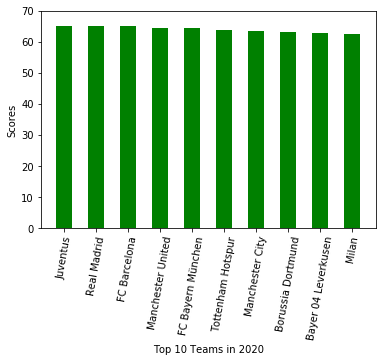

In [9]:
graph_score = final_score.iloc[:10,:]
plt.bar(graph_score.club, graph_score.final_score_20, width=0.5, color='green')
plt.xticks(rotation=80);
plt.ylim(0, 70);
plt.xlabel('Top 10 Teams in 2020')
plt.ylabel('Scores');

In [10]:
Score_report_20 = final_score.reset_index()
Score_report_20.iloc[:20, 1]

0                Juventus
1             Real Madrid
2            FC Barcelona
3       Manchester United
4       FC Bayern München
5       Tottenham Hotspur
6         Manchester City
7       Borussia Dortmund
8     Bayer 04 Leverkusen
9                   Milan
10             Sevilla FC
11              Liverpool
12                   Ajax
13                Chelsea
14    Paris Saint.Germain
15                Arsenal
16                Everton
17                  Lazio
18               FC Porto
19        Atlético Madrid
Name: club, dtype: object

## Which club is the most suited for a young player?

In [11]:
data_potential_mean1 = data['potential'].mean()
data_old1 = data[data['age']>27]
data_old_potential_mean1 = data_old1['potential'].sort_values(ascending = False).head(1000).mean()

total_mean1 = (data_potential_mean1 + data_old_potential_mean1)/2

data_young1 = data[data['potential'] > total_mean1]
data_young1 = data[data['age'] < 25]

data_young1 = data_young1.sort_values(by = 'potential', ascending = False).head(250)
data_old1 = data_old1.sort_values(by = 'potential', ascending = False).head(250)

club_young_players1 = np.array(data_young1.club.unique())
club_olders_young1 = np.array(data_old1.club.unique())

year_2020_clubs = np.intersect1d(club_young_players1, club_olders_young1)

o_a_competitive_clubs = np.intersect1d(Score_report_20.iloc[:, 1], pd.DataFrame(year_2020_clubs))

len(o_a_competitive_clubs)

club_young = pd.DataFrame(o_a_competitive_clubs)

In [12]:
club_young

,0
0,AS Monaco
1,AS Saint.Étienne
2,Ajax
3,Arsenal
4,Atalanta
5,Atlético Madrid
6,Bayer 04 Leverkusen
7,Boca Juniors
8,Borussia Dortmund
9,Borussia Mönchengladbach


## Predicting the potential of all the players

In [13]:
x_defender = defender.loc[:, ['age', 'overall', 'pace', 'shooting', 'passing',
                              'dribbling','defending', 'physic', 
                              'defending_marking','defending_standing_tackle', 
                              'value_eur','defending_sliding_tackle','movement_acceleration',
                              'movement_sprint_speed','movement_agility', 'movement_reactions',
                              'movement_balance','power_shot_power','power_jumping',
                              'power_stamina','power_strength','power_long_shots',
                              'mentality_aggression', 'mentality_interceptions',
                              'mentality_positioning','mentality_vision','mentality_penalties',
                              'mentality_composure','skill_dribbling','skill_curve', 
                              'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                              'lwb','lb','rb','rwb','lcb','cb','rcb', 'attacking_crossing',
                              'attacking_finishing','attacking_heading_accuracy',
                              'attacking_short_passing','attacking_volleys']]
y_defender = defender['potential']

columns = []
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 15)
rfe_fit = rfe.fit(x_defender, y_defender)

for feat in x_defender.columns[rfe_fit.support_]:
    columns.append(feat)
    
x_defender = x_defender.loc[:, columns]
X_train, X_test, y_train, y_test = train_test_split(x_defender, y_defender, test_size=.33, random_state=42)

r = Ridge(alpha = 1.0, fit_intercept=True)
r.fit(X_train, y_train)
predict = r.predict(X_test)
print('The R2 score for Ridge is:', r2_score(y_test, predict))

l = Lasso(alpha = 1.0, fit_intercept=True)
l.fit(X_train, y_train)
predict = l.predict(X_test)
print('The R2 score for Lasso is:', r2_score(y_test, predict))

The R2 score for Ridge is: 0.8462274655521133
The R2 score for Lasso is: 0.8348581708214149


In [14]:
x_midfielder = midfielder.loc[:, ['age', 'overall', 'pace', 'shooting', 'passing', 'dribbling',
                                'defending', 'physic', 'value_eur','movement_acceleration', 'skill_moves',
                                'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                                'movement_balance','power_shot_power', 'power_jumping', 
                                'power_stamina','power_strength','power_long_shots', 
                                'mentality_aggression', 'mentality_interceptions',
                                'mentality_positioning','mentality_vision','mentality_penalties',
                                'mentality_composure','skill_dribbling','skill_curve', 
                                'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                                'attacking_crossing', 'attacking_finishing','attacking_heading_accuracy',
                                'attacking_short_passing', 'attacking_volleys', 'lw', 'rw', 'lam', 
                                'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm','ldm','cdm','rdm']]
y_midfielder = midfielder['potential']

columns = []
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 15)
rfe_fit = rfe.fit(x_midfielder, y_midfielder)

for feat in x_midfielder.columns[rfe_fit.support_]:
    columns.append(feat)
    
x_midfielder = x_midfielder.loc[:, columns]
X_train, X_test, y_train, y_test = train_test_split(x_midfielder, y_midfielder, test_size=.33, random_state=42)

r = Ridge(alpha = 1.0, fit_intercept=True)
r.fit(X_train, y_train)
predict = r.predict(X_test)
print('The R2 score for Ridge is:', r2_score(y_test, predict))

l = Lasso(alpha = 1.0, fit_intercept=True)
l.fit(X_train, y_train)
predict = l.predict(X_test)
print('The R2 score for Lasso is:', r2_score(y_test, predict))

The R2 score for Ridge is: 0.8339005995298774
The R2 score for Lasso is: 0.8288813420679706


In [15]:
x_forward = forward.loc[:, ['age', 'overall', 'pace', 'shooting', 'passing', 'dribbling',
                            'defending', 'physic', 'value_eur', 'movement_acceleration', 'skill_moves',
                            'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                            'movement_balance','power_shot_power', 'power_jumping', 
                            'power_stamina','power_strength','power_long_shots', 
                            'mentality_aggression', 'mentality_interceptions','mentality_positioning',
                            'mentality_vision','mentality_penalties','mentality_composure',
                            'skill_dribbling','skill_curve', 'skill_fk_accuracy', 
                            'skill_long_passing', 'skill_ball_control',
                            'attacking_crossing', 'attacking_finishing','attacking_heading_accuracy',
                            'attacking_short_passing', 'attacking_volleys', 
                            'ls','st','rs','lf','cf','rf']]
y_forward = forward['potential']

columns = []
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 15)
rfe_fit = rfe.fit(x_forward, y_forward)

for feat in x_forward.columns[rfe_fit.support_]:
    columns.append(feat)
    
x_forward = x_forward.loc[:, columns]
X_train, X_test, y_train, y_test = train_test_split(x_forward, y_forward, test_size=.33, random_state=42)

r = Ridge(alpha = 1.0, fit_intercept=True)
r.fit(X_train, y_train)
predict = r.predict(X_test)
print('The R2 score for Ridge is:', r2_score(y_test, predict))

l = Lasso(alpha = 1.0, fit_intercept=True)
l.fit(X_train, y_train)
predict = l.predict(X_test)
print('The R2 score for Lasso is:', r2_score(y_test, predict))

The R2 score for Ridge is: 0.8425032890629185
The R2 score for Lasso is: 0.8331093297543483


In [16]:
x_goalkeeper = goalkeeper.loc[:, ['age', 'overall', 'pace', 'shooting', 'passing', 'dribbling', 
                                  'defending','physic','gk_diving','gk_handling',
                                  'gk_kicking','gk_reflexes','gk_speed','gk_positioning',
                                  'movement_acceleration','movement_sprint_speed',
                                  'movement_agility','movement_reactions','movement_balance',
                                  'power_shot_power','power_jumping','power_stamina','power_strength',
                                  'power_long_shots','mentality_aggression','mentality_interceptions',
                                  'mentality_positioning','mentality_vision',
                                  'mentality_penalties','mentality_composure']]
y_goalkeeper = goalkeeper['potential']

columns = []
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 15)
rfe_fit = rfe.fit(x_goalkeeper, y_goalkeeper)

for feat in x_goalkeeper.columns[rfe_fit.support_]:
    columns.append(feat)
    
x_goalkeeper = x_goalkeeper.loc[:, columns]
X_train, X_test, y_train, y_test = train_test_split(x_goalkeeper, y_goalkeeper, test_size=.33, random_state=42)

r = Ridge(alpha = 1.0, fit_intercept=True)
r.fit(X_train, y_train)
predict = r.predict(X_test)
print('The R2 score for Ridge is:', r2_score(y_test, predict))

l = Lasso(alpha = 1.0, fit_intercept=True)
l.fit(X_train, y_train)
predict = l.predict(X_test)
print('The R2 score for Lasso is:', r2_score(y_test, predict))

The R2 score for Ridge is: 0.8514542890111596
The R2 score for Lasso is: 0.8465938426468274
